## **Problem 1 Statement**

CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

**Upload Required Libraries**

In [83]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

**Importing data**

In [84]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ML : Project/Election_Data.xlsx'
df = pd.read_excel(file_path, sheet_name="Election_Dataset_Two Classes")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**EDA**

In [85]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male



**Shape**

In [86]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  10


**Data type of data features**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


**removing unwanted columns**

In [88]:
df = df.drop(columns=['Unnamed: 0'])

In [89]:
df.rename(columns={'economic.cond.national': 'economic national condition', 'economic.cond.household': 'economic household condition', "political.knowledge": "political knowledge"}, inplace=True)

In [90]:
# Assuming your DataFrame is named 'df'

# Define the mapping
vote_mapping = {'Conservative': 0, 'Labour': 1}

# Replace values in the 'Vote' column and convert to int
df['vote'] = df['vote'].replace(vote_mapping).astype(int)

# Check the updated DataFrame
df.head()


,vote,age,economic national condition,economic household condition,Blair,Hague,Europe,political knowledge,gender
0,1,43,3,3,4,1,2,2,female
1,1,36,4,4,4,4,5,2,male
2,1,35,4,4,5,2,3,2,male
3,1,24,4,2,2,1,4,0,female
4,1,41,2,2,1,1,6,2,male


**Making different list for categorical columns and numerical columns**


In [91]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)



['gender']
['vote', 'age', 'economic national condition', 'economic household condition', 'Blair', 'Hague', 'Europe', 'political knowledge']


**Describe for numerical and categorical columns**

In [92]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1525.0,0.697049,0.459685,0.0,0.0,1.0,1.0,1.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic national condition,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic household condition,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [93]:
df[cat].describe().T

,count,unique,top,freq
gender,1525,2,female,812


**unique values for categorical variables**

In [94]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [95]:
# Are there any missing values ?
df.isnull().sum()

vote                            0
age                             0
economic national condition     0
economic household condition    0
Blair                           0
Hague                           0
Europe                          0
political knowledge             0
gender                          0
dtype: int64

In [96]:
## Are there any duplicate records

# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic national condition,economic household condition,Blair,Hague,Europe,political knowledge,gender
67,1,35,4,4,5,2,3,2,male
626,1,39,3,4,4,2,5,2,male
870,1,38,2,4,2,2,4,3,male
983,0,74,4,3,2,4,8,2,female
1154,0,53,3,4,2,2,6,0,female
1236,1,36,3,3,2,2,6,2,female
1244,1,29,4,4,4,2,2,2,female
1438,1,40,4,3,4,2,2,2,male


In [97]:
df = df.drop_duplicates()

In [98]:
# Check for duplicate data after dropping duplicates

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   vote                          1517 non-null   int64 
 1   age                           1517 non-null   int64 
 2   economic national condition   1517 non-null   int64 
 3   economic household condition  1517 non-null   int64 
 4   Blair                         1517 non-null   int64 
 5   Hague                         1517 non-null   int64 
 6   Europe                        1517 non-null   int64 
 7   political knowledge           1517 non-null   int64 
 8   gender                        1517 non-null   object
dtypes: int64(8), object(1)
memory usage: 118.5+ KB


In [100]:
df.isnull().sum()

vote                            0
age                             0
economic national condition     0
economic household condition    0
Blair                           0
Hague                           0
Europe                          0
political knowledge             0
gender                          0
dtype: int64

**Check for outliers**

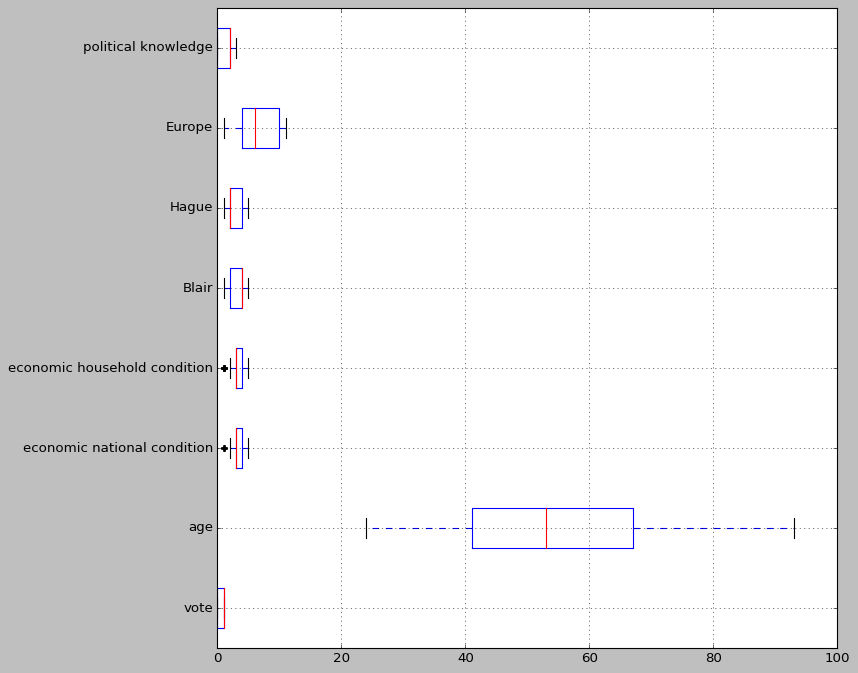

In [101]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

In [102]:
# Calculate the IQR for the specified columns
Q1 = df[['economic national condition', 'economic household condition']].quantile(0.25)
Q3 = df[['economic national condition', 'economic household condition']].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows where any value is outside the bounds
outliers = ((df[['economic national condition', 'economic household condition']] < lower_bound) |
            (df[['economic national condition', 'economic household condition']] > upper_bound)).any(axis=1)

# Remove outliers from the DataFrame
df = df[~outliers]

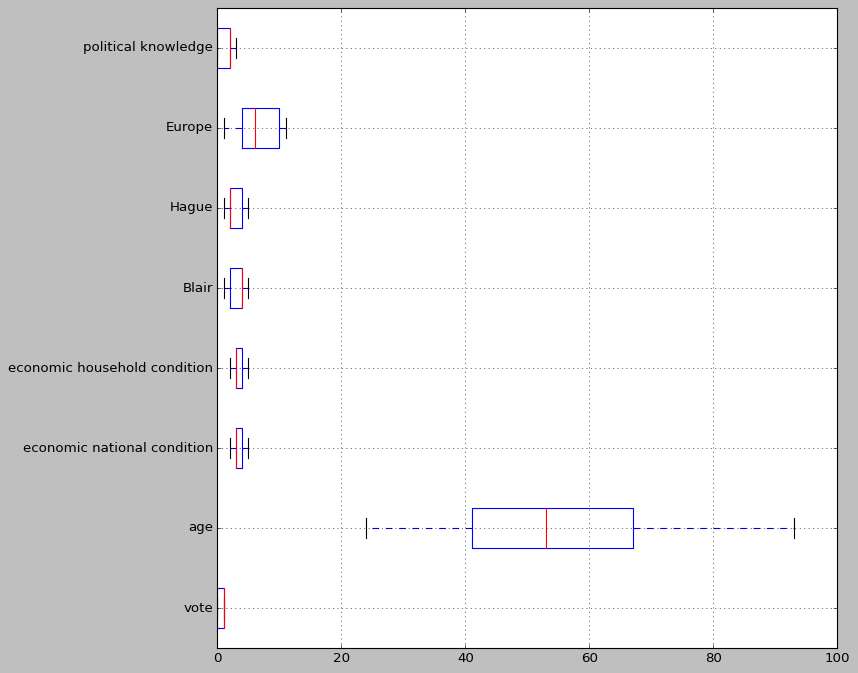

In [103]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

In [104]:
df.isnull().sum()

vote                            0
age                             0
economic national condition     0
economic household condition    0
Blair                           0
Hague                           0
Europe                          0
political knowledge             0
gender                          0
dtype: int64

In [105]:
print(cat)
print(num)

['gender']
['vote', 'age', 'economic national condition', 'economic household condition', 'Blair', 'Hague', 'Europe', 'political knowledge']


**Univariate Analysis**

1    1011
0     419
Name: vote, dtype: int64


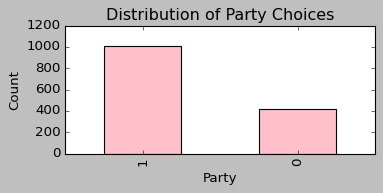

In [106]:
# Frequency Table
vote_frequency = df['vote'].value_counts()
print(vote_frequency)

# Bar Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 2))
df['vote'].value_counts().plot(kind='bar', color='pink')
plt.title('Distribution of Party Choices')
plt.xlabel('Party')
plt.ylabel('Count')
plt.show()


**Insights**

*   The majority of respondents (1011 instances) chose 'Labour' as their preferred party.'Conservative' received fewer votes, with 419 instances.
*   There is an imbalance in the distribution of votes, with 'Labour' having a significantly higher count than 'Conservative.'
* The higher count for 'Labour' may suggest broader support or popularity for that party among the surveyed individuals.The lower count for 'Conservative' may indicate a smaller portion of respondents favoring that party.



female    756
male      674
Name: gender, dtype: int64


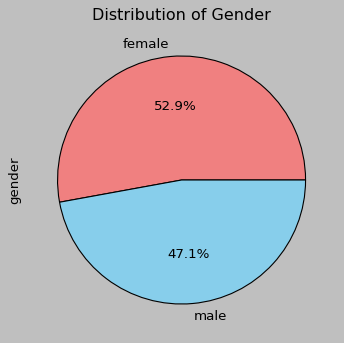

In [107]:
# Frequency Table
gender_frequency = df['gender'].value_counts()
print(gender_frequency)

# Pie Chart
plt.figure(figsize=(5, 5))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Distribution of Gender')
plt.show()


**Insights**


*   The dataset includes responses from both females and males.The count for females is 756, while the count for males is 674.
*   The distribution is relatively balanced, with a slightly higher count for females compared to males.The gender distribution suggests a representation of both genders in the surveyed population.

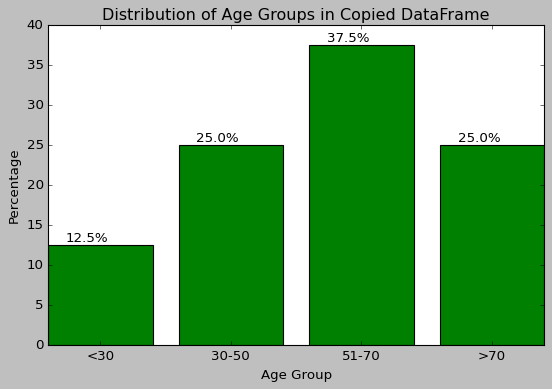

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a copy of the DataFrame
df1 = df.copy()

# Sample DataFrame (replace this with your actual DataFrame)
data = {'age': [25, 35, 40, 55, 60, 65, 70, 80]}
df1 = pd.DataFrame(data)

# Define age groups
age_bins = [0, 30, 50, 70, float('inf')]
age_labels = ['<30', '30-50', '51-70', '>70']

# Create a new 'age_group' column in the copied DataFrame
df1['age_group'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the percentage values for each age group in the copied DataFrame
percentage_values = (df1['age_group'].value_counts(normalize=True) * 100).sort_index()

# Bar plot with percentage labels
plt.figure(figsize=(8, 5))
bars = plt.bar(percentage_values.index, percentage_values, color='green', edgecolor='black')

# Adding percentage labels on top of bars
total_count = len(df1)
for bar, percentage in zip(bars, percentage_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, f'{percentage:.1f}%', ha='center')

plt.title('Distribution of Age Groups in Copied DataFrame')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.show()


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   vote                          1430 non-null   int64 
 1   age                           1430 non-null   int64 
 2   economic national condition   1430 non-null   int64 
 3   economic household condition  1430 non-null   int64 
 4   Blair                         1430 non-null   int64 
 5   Hague                         1430 non-null   int64 
 6   Europe                        1430 non-null   int64 
 7   political knowledge           1430 non-null   int64 
 8   gender                        1430 non-null   object
dtypes: int64(8), object(1)
memory usage: 111.7+ KB


**Indights**
* The majority of respondents fall into the '51-70' age group, constituting 37.5% of the total. The second most common age group is '30-50' with a percentage of 25%.
'51-70' is followed closely by '<30' and '>70', both with a percentage of 12.5%.

* The survey respondents are relatively evenly distributed across different age groups. A notable portion falls into the middle age group ('51-70'), indicating a substantial representation from a demographic typically associated with significant life experiences and responsibilities

Frequency Distribution:
3    581
4    526
2    243
5     80
Name: economic national condition, dtype: int64


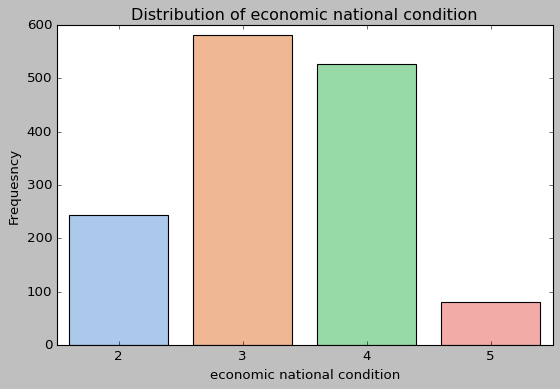

In [110]:
# Display the frequency distribution
vote_counts = df['economic national condition'].value_counts()
print("Frequency Distribution:")
print(vote_counts)

# Bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.countplot(x='economic national condition', data=df, palette = 'pastel')
plt.title('Distribution of economic national condition')
plt.xlabel('economic national condition')
plt.ylabel('Frequesncy')

# Display the plot
plt.show()


**Insights**

* The most common response for the assessment of the national economic condition is '3', with 581 occurrences. The second most common response is '4', with 526 occurrences. '2' is the third most common response, with 243 occurrences. The least common response is '5', with 80 occurrences.
Implications:

* A substantial number of respondents perceive the national economic condition to be moderate ('3') or relatively positive ('4').
There is a smaller group of respondents who perceive the condition as either very positive ('5') or somewhat negative ('2').
* The distribution suggests that the majority of respondents have a moderate to positive view of the national economic condition.

Frequency Distribution:
3    638
4    431
2    270
5     91
Name: economic household condition, dtype: int64


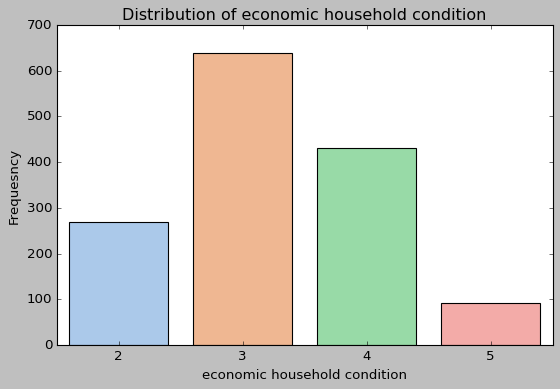

In [111]:
# Display the frequency distribution
vote_counts = df['economic household condition'].value_counts()
print("Frequency Distribution:")
print(vote_counts)

# Bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.countplot(x='economic household condition', data=df, palette = 'pastel')
plt.title('Distribution of economic household condition')
plt.xlabel('economic household condition')
plt.ylabel('Frequesncy')

# Display the plot
plt.show()


**Insights**
* The most common response for the assessment of the household economic condition is '3', with 638 occurrences. The second most common response is '4', with 431 occurrences. '2' is the third most common response, with 270 occurrences. The least common response is '5', with 91 occurrences.

* Comparing with the national economic condition, respondents seem to be slightly more optimistic about their household economic condition, as indicated by a higher count for the responses '3' and '4'.

* Similar to the national economic condition, the majority of respondents have a moderate to positive view of their household economic condition.While '3' and '4' are the predominant responses, there is still variability in responses, suggesting a diversity of economic perceptions among respondents.


Frequency Distribution:
4    799
2    400
5    150
1     80
3      1
Name: Blair, dtype: int64


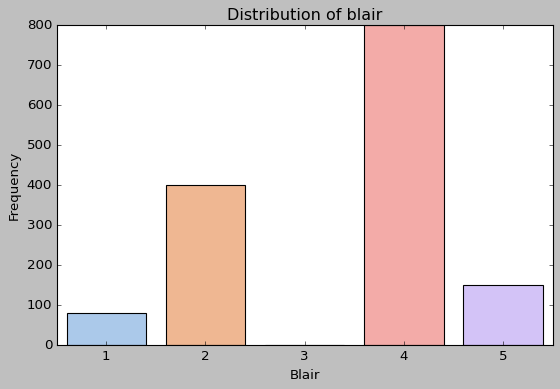

In [112]:
# Display the frequency distribution
vote_counts = df['Blair'].value_counts()
print("Frequency Distribution:")
print(vote_counts)

# Bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.countplot(x='Blair', data=df, palette = 'pastel')
plt.title('Distribution of blair')
plt.xlabel('Blair')
plt.ylabel('Frequency')

# Display the plot
plt.show()


**Insights**

* The majority of respondents (799 occurrences) gave a rating of '4,' indicating a prevalent positive assessment of the Labour party leadership.

* While '4' is the most common rating, there is notable variability in responses. Some respondents provided lower ratings ('2' and '1'), suggesting diverse opinions on the leadership quality.

* Ratings '2' and '5' received moderate frequencies (400 and 150 occurrences, respectively). This suggests a mix of less positive and highly positive assessments.

* The rating '1' received 80 occurrences, indicating a relatively low count of respondents with a very negative assessment of the Labour party leadership.

* The extreme ratings '1' and '5' combined constitute 230 occurrences, representing respondents with more polarized opinions.

* The neutral rating '3' occurred only once, suggesting that a very small proportion of respondents had a neutral stance on the leadership.

Frequency Distribution:
2    590
4    514
1    224
5     67
3     35
Name: Hague, dtype: int64


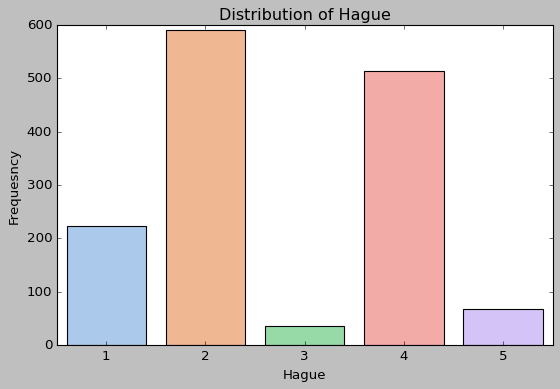

In [113]:
# Display the frequency distribution
vote_counts = df['Hague'].value_counts()
print("Frequency Distribution:")
print(vote_counts)

# Bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.countplot(x='Hague', data=df, palette = 'pastel')
plt.title('Distribution of Hague')
plt.xlabel('Hague')
plt.ylabel('Frequesncy')

# Display the plot
plt.show()


**Insights**

* The most common assessment of the Conservative leader, Hague, is '2', with 590 occurrences. The second most common assessment is '4', with 514 occurrences. '1' is the third most common assessment, with 224 occurrences.
'5' has 67 occurrences, and '3' has 35 occurrences.

* The assessments for William Hague are distributed across the range of the scale, with '2' being the mode, indicating a central tendency towards a moderate assessment.

* The combined occurrences for ratings '2' and '4' suggest that respondents generally provided moderate to positive assessments of William Hague's leadership.

* The occurrences for ratings '1' and '3' suggest a lower count of respondents with negative assessments.

* The rating '5' received a relatively lower count (67 occurrences), suggesting a smaller proportion of respondents with an extremely positive assessment.

* The distribution indicates diversity in respondents' opinions, with assessments spread across different levels of positivity.

Frequency Distribution:
11    307
6     195
3     124
5     121
4     120
1     106
8     102
9     100
10     98
7      81
2      76
Name: Europe, dtype: int64


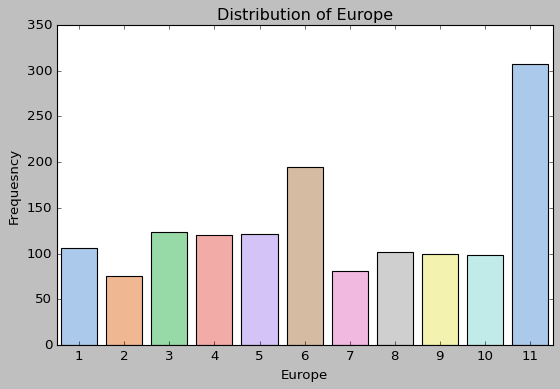

In [114]:
# Display the frequency distribution
vote_counts = df['Europe'].value_counts()
print("Frequency Distribution:")
print(vote_counts)

# Bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.countplot(x='Europe', data=df, palette = 'pastel')
plt.title('Distribution of Europe')
plt.xlabel('Europe')
plt.ylabel('Frequesncy')

# Display the plot
plt.show()


**Insights**

* The most common attitude towards European integration is represented by the rating '11', with 307 occurrences.
The second most common attitude is '6', with 195 occurrences.
Ratings '3', '5', and '4' have similar frequencies, with 124, 121, and 120 occurrences, respectively.

* The most common attitude towards European integration is represented by the rating '11', with 307 occurrences.
The second most common attitude is '6', with 195 occurrences.
Ratings '3', '5', and '4' have similar frequencies, with 124, 121, and 120 occurrences, respectively.

* There is a noticeable polarization in attitudes, with ratings at both extremes ('1' and '11') having relatively high occurrences.

* Segmenting the respondents based on their attitudes towards Europe may reveal patterns in opinions and preferences.

Frequency Distribution:
2    733
0    425
3    237
1     35
Name: political knowledge, dtype: int64


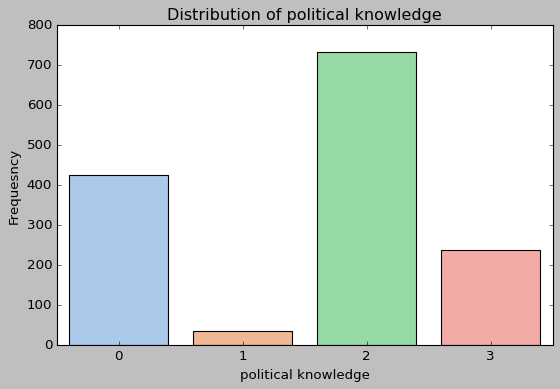

In [115]:
# Display the frequency distribution
vote_counts = df['political knowledge'].value_counts()
print("Frequency Distribution:")
print(vote_counts)

# Bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.countplot(x='political knowledge', data=df, palette = 'pastel')
plt.title('Distribution of political knowledge')
plt.xlabel('political knowledge')
plt.ylabel('Frequesncy')

# Display the plot
plt.show()


The most common level of political knowledge is represented by the rating '2', with 733 occurrences.
The second most common level is '0', with 425 occurrences.
Ratings '3' and '1' have lower frequencies, with 237 and 35 occurrences, respectively.

The distribution suggests that a significant number of respondents have a moderate level of political knowledge, as indicated by the higher count for rating '2'.

The occurrences for ratings '0' and '3' represent respondents with lower and higher levels of political knowledge, respectively.
Consideration for Further Analysis:


###  Bivariate and Multivariate Analysis

In [116]:
print(num)
print(cat)

['vote', 'age', 'economic national condition', 'economic household condition', 'Blair', 'Hague', 'Europe', 'political knowledge']
['gender']


In [117]:
df.head()

,vote,age,economic national condition,economic household condition,Blair,Hague,Europe,political knowledge,gender
0,1,43,3,3,4,1,2,2,female
1,1,36,4,4,4,4,5,2,male
2,1,35,4,4,5,2,3,2,male
3,1,24,4,2,2,1,4,0,female
4,1,41,2,2,1,1,6,2,male


**Bivariate Analysis**

In [118]:
# Assuming your DataFrame is named 'df'

# Bivariate Analysis 2: Economic Condition (National) vs. Economic Condition (Household)
cross_tab_eco = pd.crosstab(df['economic national condition'], df['economic household condition'])
print("Cross Tabulation for National Economic Condition vs. Household Economic Condition:")
print(cross_tab_eco)

# Bivariate Analysis 3: Blair vs. Political Knowledge
cross_tab_blair = pd.crosstab(df['Blair'], df['political knowledge'])
print("\nCross Tabulation for Blair vs. Political Knowledge:")
print(cross_tab_blair)

# Bivariate Analysis 4: Hague vs. Political Knowledge
cross_tab_hague = pd.crosstab(df['Hague'], df['political knowledge'])
print("\nCross Tabulation for Hague vs. Political Knowledge:")
print(cross_tab_hague)

# Bivariate Analysis 5: Gender vs. Vote
cross_tab_gender_vote = pd.crosstab(df['gender'], df['vote'])
print("\nCross Tabulation for Gender vs. Vote:")
print(cross_tab_gender_vote)

# Bivariate Analysis 6: Political Knowledge vs. Europe
cross_tab_pk_europe = pd.crosstab(df['political knowledge'], df['Europe'])
print("\nCross Tabulation for Political Knowledge vs. Europe:")
print(cross_tab_pk_europe)


Cross Tabulation for National Economic Condition vs. Household Economic Condition:
economic household condition    2    3    4   5
economic national condition                    
2                             105   91   42   5
3                             101  320  134  26
4                              57  198  232  39
5                               7   29   23  21

Cross Tabulation for Blair vs. Political Knowledge:
political knowledge    0   1    2    3
Blair                                 
1                     17   2   44   17
2                    121  12  207   60
3                      0   0    0    1
4                    239  20  407  133
5                     48   1   75   26

Cross Tabulation for Hague vs. Political Knowledge:
political knowledge    0   1    2   3
Hague                                
1                     62   4  100  58
2                    177  13  307  93
3                     12   4   13   6
4                    158  11  277  68
5                     

**Correlation Plot**

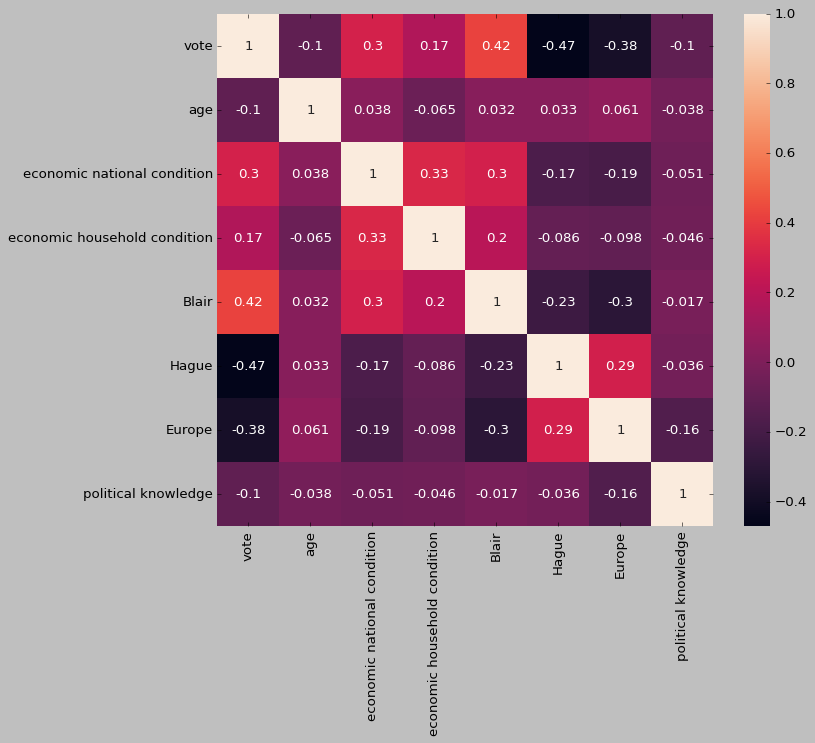

In [119]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [120]:
#### get_dummies of the object variables

In [121]:
print(cat)

['gender']


**Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to
multicollinearity . This is done to ensure that we do not land in to dummy trap.**

In [122]:
df =pd.get_dummies(df, columns=cat,drop_first=True)

In [123]:
df.head()

,vote,age,economic national condition,economic household condition,Blair,Hague,Europe,political knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [124]:
df.isnull().sum()

vote                            0
age                             0
economic national condition     0
economic household condition    0
Blair                           0
Hague                           0
Europe                          0
political knowledge             0
gender_male                     0
dtype: int64

Scaling the variables as continuous variables have different weightage using min-max technique

In [125]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df[num] = df[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

# Check the updated DataFrame
df.head()

,vote,age,economic national condition,economic household condition,Blair,Hague,Europe,political knowledge,gender_male
0,1.0,0.275362,0.333333,0.333333,0.75,0.00,0.1,0.666667,0
1,1.0,0.173913,0.666667,0.666667,0.75,0.75,0.4,0.666667,1
2,1.0,0.159420,0.666667,0.666667,1.00,0.25,0.2,0.666667,1
3,1.0,0.000000,0.666667,0.000000,0.25,0.00,0.3,0.000000,0
4,1.0,0.246377,0.000000,0.000000,0.00,0.00,0.5,0.666667,1


In [126]:
df.isnull().sum()

vote                            0
age                             0
economic national condition     0
economic household condition    0
Blair                           0
Hague                           0
Europe                          0
political knowledge             0
gender_male                     0
dtype: int64

**Train-Test Split**

In [127]:
df.columns

Index(['vote', 'age', 'economic national condition',
       'economic household condition', 'Blair', 'Hague', 'Europe',
       'political knowledge', 'gender_male'],
      dtype='object')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   vote                          1430 non-null   float64
 1   age                           1430 non-null   float64
 2   economic national condition   1430 non-null   float64
 3   economic household condition  1430 non-null   float64
 4   Blair                         1430 non-null   float64
 5   Hague                         1430 non-null   float64
 6   Europe                        1430 non-null   float64
 7   political knowledge           1430 non-null   float64
 8   gender_male                   1430 non-null   uint8  
dtypes: float64(8), uint8(1)
memory usage: 101.9 KB


In [129]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.
y = df['vote']

In [130]:
X.head()

,age,economic national condition,economic household condition,Blair,Hague,Europe,political knowledge,gender_male
0,0.275362,0.333333,0.333333,0.75,0.00,0.1,0.666667,0
1,0.173913,0.666667,0.666667,0.75,0.75,0.4,0.666667,1
2,0.159420,0.666667,0.666667,1.00,0.25,0.2,0.666667,1
3,0.000000,0.666667,0.000000,0.25,0.00,0.3,0.000000,0
4,0.246377,0.000000,0.000000,0.00,0.00,0.5,0.666667,1


In [131]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: vote, dtype: float64

In [132]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Naive Bayes Model

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [134]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [135]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8432835820895522
[[228  86]
 [ 82 676]]
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       314
         1.0       0.89      0.89      0.89       758

    accuracy                           0.84      1072
   macro avg       0.81      0.81      0.81      1072
weighted avg       0.84      0.84      0.84      1072



In [136]:
y_test.value_counts()

1.0    253
0.0    105
Name: vote, dtype: int64

In [137]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8072625698324022
[[ 67  38]
 [ 31 222]]
              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66       105
         1.0       0.85      0.88      0.87       253

    accuracy                           0.81       358
   macro avg       0.77      0.76      0.76       358
weighted avg       0.80      0.81      0.81       358



#### The most important Model Evaluation metric here is Recall. Recall (red cells) is a measurement of the proportion of correct       ####  positive results, and is also known as the True Positive Rate, or Sensitivity.
#### Reason:
#### i)Accuracy is not considered because we have an imbalanced dataset.
#### ii)Our main goal here is to reduce the Type-2 error i.e False-Negative.
####                For e.g Consider a person actually has cancer and the model model predicted no cancer. This can be a disaster.

## Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression
Log_model= LogisticRegression()
Log_model.fit(X_train, y_train)

LogisticRegression()

In [139]:
## Performance Matrix on train data set
y_train_predict = Log_model.predict(X_train)
model_score = Log_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8507462686567164
[[213 101]
 [ 59 699]]
              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73       314
         1.0       0.87      0.92      0.90       758

    accuracy                           0.85      1072
   macro avg       0.83      0.80      0.81      1072
weighted avg       0.85      0.85      0.85      1072



In [140]:
## Performance Matrix on test data set
y_test_predict = Log_model.predict(X_test)
model_score = Log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8044692737430168
[[ 60  45]
 [ 25 228]]
              precision    recall  f1-score   support

         0.0       0.71      0.57      0.63       105
         1.0       0.84      0.90      0.87       253

    accuracy                           0.80       358
   macro avg       0.77      0.74      0.75       358
weighted avg       0.80      0.80      0.80       358



## Ada Boost

In [141]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [142]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8572761194029851
[[228  86]
 [ 67 691]]
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75       314
         1.0       0.89      0.91      0.90       758

    accuracy                           0.86      1072
   macro avg       0.83      0.82      0.82      1072
weighted avg       0.86      0.86      0.86      1072



In [143]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8100558659217877
[[ 64  41]
 [ 27 226]]
              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65       105
         1.0       0.85      0.89      0.87       253

    accuracy                           0.81       358
   macro avg       0.77      0.75      0.76       358
weighted avg       0.80      0.81      0.81       358



## Gradient Boosting

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [145]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9029850746268657
[[247  67]
 [ 37 721]]
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       314
         1.0       0.91      0.95      0.93       758

    accuracy                           0.90      1072
   macro avg       0.89      0.87      0.88      1072
weighted avg       0.90      0.90      0.90      1072



In [146]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8156424581005587
[[ 63  42]
 [ 24 229]]
              precision    recall  f1-score   support

         0.0       0.72      0.60      0.66       105
         1.0       0.85      0.91      0.87       253

    accuracy                           0.82       358
   macro avg       0.78      0.75      0.77       358
weighted avg       0.81      0.82      0.81       358



## KNN Model

In [147]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [148]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8843283582089553
[[239  75]
 [ 49 709]]
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79       314
         1.0       0.90      0.94      0.92       758

    accuracy                           0.88      1072
   macro avg       0.87      0.85      0.86      1072
weighted avg       0.88      0.88      0.88      1072



In [149]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7793296089385475
[[ 57  48]
 [ 31 222]]
              precision    recall  f1-score   support

         0.0       0.65      0.54      0.59       105
         1.0       0.82      0.88      0.85       253

    accuracy                           0.78       358
   macro avg       0.73      0.71      0.72       358
weighted avg       0.77      0.78      0.77       358



## Decision Tree

In [150]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [151]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990671641791045
[[314   0]
 [  1 757]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       314
         1.0       1.00      1.00      1.00       758

    accuracy                           1.00      1072
   macro avg       1.00      1.00      1.00      1072
weighted avg       1.00      1.00      1.00      1072



In [152]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7402234636871509
[[ 58  47]
 [ 46 207]]
              precision    recall  f1-score   support

         0.0       0.56      0.55      0.56       105
         1.0       0.81      0.82      0.82       253

    accuracy                           0.74       358
   macro avg       0.69      0.69      0.69       358
weighted avg       0.74      0.74      0.74       358



## Random Forest

In [153]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [154]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990671641791045
[[313   1]
 [  0 758]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       314
         1.0       1.00      1.00      1.00       758

    accuracy                           1.00      1072
   macro avg       1.00      1.00      1.00      1072
weighted avg       1.00      1.00      1.00      1072



In [155]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7793296089385475
[[ 60  45]
 [ 34 219]]
              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60       105
         1.0       0.83      0.87      0.85       253

    accuracy                           0.78       358
   macro avg       0.73      0.72      0.73       358
weighted avg       0.77      0.78      0.78       358



## Bagging

In [156]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [157]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990671641791045
[[313   1]
 [  0 758]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       314
         1.0       1.00      1.00      1.00       758

    accuracy                           1.00      1072
   macro avg       1.00      1.00      1.00      1072
weighted avg       1.00      1.00      1.00      1072



In [158]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.770949720670391
[[ 58  47]
 [ 35 218]]
              precision    recall  f1-score   support

         0.0       0.62      0.55      0.59       105
         1.0       0.82      0.86      0.84       253

    accuracy                           0.77       358
   macro avg       0.72      0.71      0.71       358
weighted avg       0.76      0.77      0.77       358



### **Problem 2 : Text Analysis**

In [159]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

**Define the problem and Perform Exploratory Data Analysis**

In [160]:
import nltk
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [161]:

# Get the file IDs for the three speeches
speech1_fileid = '1941-Roosevelt.txt'
speech2_fileid = '1961-Kennedy.txt'
speech3_fileid = '1973-Nixon.txt'

# Get the raw text of each speech
speech1_text = inaugural.raw(speech1_fileid)
speech2_text = inaugural.raw(speech2_fileid)
speech3_text = inaugural.raw(speech3_fileid)

# Display the raw text of each speech
print("Speech 1 - 1941 Roosevelt:")
print(speech1_text[:500])  # Displaying the first 500 characters for illustration

print("\nSpeech 2 - 1961 Kennedy:")
print(speech2_text[:500])  # Displaying the first 500 characters for illustration

print("\nSpeech 3 - 1973 Nixon:")
print(speech3_text[:500])  # Displaying the first 500 characters for illustration


Speech 1 - 1941 Roosevelt:
On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment

Speech 2 - 1961 Kennedy:
Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.


In [162]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize into sentences and words
speech1_sentences = sent_tokenize(speech1_text)
speech1_words = word_tokenize(speech1_text)

speech2_sentences = sent_tokenize(speech2_text)
speech2_words = word_tokenize(speech2_text)

speech3_sentences = sent_tokenize(speech3_text)
speech3_words = word_tokenize(speech3_text)

# Calculate the number of characters, words, and sentences for each speech
speech1_characters = len(speech1_text)
speech1_num_words = len(speech1_words)
speech1_num_sentences = len(speech1_sentences)

speech2_characters = len(speech2_text)
speech2_num_words = len(speech2_words)
speech2_num_sentences = len(speech2_sentences)

speech3_characters = len(speech3_text)
speech3_num_words = len(speech3_words)
speech3_num_sentences = len(speech3_sentences)

# Display the results
print("Speech 1 - 1941 Roosevelt:")
print(f"Number of characters: {speech1_characters}")
print(f"Number of words: {speech1_num_words}")
print(f"Number of sentences: {speech1_num_sentences}\n")

print("Speech 2 - 1961 Kennedy:")
print(f"Number of characters: {speech2_characters}")
print(f"Number of words: {speech2_num_words}")
print(f"Number of sentences: {speech2_num_sentences}\n")

print("Speech 3 - 1973 Nixon:")
print(f"Number of characters: {speech3_characters}")
print(f"Number of words: {speech3_num_words}")
print(f"Number of sentences: {speech3_num_sentences}\n")


Speech 1 - 1941 Roosevelt:
Number of characters: 7571
Number of words: 1526
Number of sentences: 68

Speech 2 - 1961 Kennedy:
Number of characters: 7618
Number of words: 1543
Number of sentences: 52

Speech 3 - 1973 Nixon:
Number of characters: 9991
Number of words: 2006
Number of sentences: 68



 **Problem 2 - Text cleaning**

In [163]:
import nltk
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')

# Define stop words
stop_words = set(stopwords.words('english'))

# Define Porter Stemmer
porter_stemmer = PorterStemmer()

# Get all inaugural speeches from the corpus
all_speeches = inaugural.fileids()

# Tokenize, remove stopwords, and apply stemming for all speeches
all_words = []
for speech_fileid in all_speeches:
    speech_text = inaugural.raw(speech_fileid)
    speech_words = word_tokenize(speech_text)
    filtered_words = [porter_stemmer.stem(word.lower()) for word in speech_words if word.lower() not in stop_words and len(word) > 1]
    all_words.extend(filtered_words)

# Count the occurrences of each word
all_word_counts = Counter(all_words)

# Find the three most common words
common_words = all_word_counts.most_common(3)

# Display the result
print("Three most common words after stopword removal and stemming:")
for word, count in common_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Three most common words after stopword removal and stemming:
nation: 689
govern: 657
peopl: 633


**Problem 2 - Plot Word cloud of all three speeches**


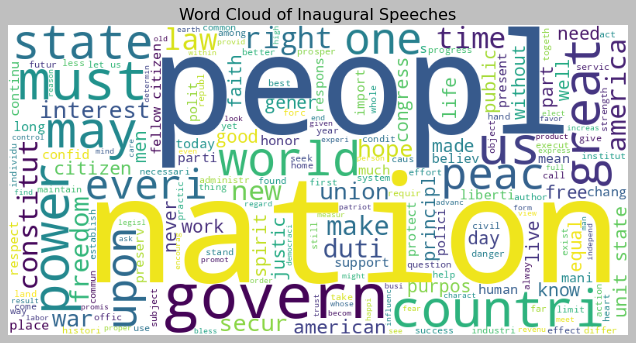

In [164]:
from wordcloud import WordCloud

# Combine the words into a single string
text = ' '.join(all_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Inaugural Speeches')
plt.show()
